In [169]:
library(tidyverse)
library(dplyr)

In [210]:
load("./ICPSR_38779/DS0001/38779-0001-Data.rda")

load("./ICPSR_38740/DS0001/38740-0001-Data.rda")

load("./ICPSR_38743/DS0001/38743-0001-Data.rda")

names(da38779.0001)

[1] "ASR_ID"   "CONTENTS" "STATE"    "ORI"      "GROUP"    "DIV"     
 [7] "AGHEADER" "YEAR"     "MSA"      "COUNTY"   "SEQNO"    "SUB"     
[13] "CORE"     "COVBY"    "POP"      "AGENCY"   "STNAME"   "MONTH"   
[19] "MOHEADER" "BREAK"    "AREO"     "ZERO"     "DTLASTUP" "DTPRUP1" 
[25] "DTPRUP2"  "JUVDISP"  "JDHANDDP" "JDREFJC"  "JDREFWA"  "JDREFOPA"
[31] "JDREFCC"  "OFFENSE"  "OCCUR"    "M0_9"     "M10_12"   "M13_14"  
[37] "M15"      "M16"      "M17"      "M18"      "M19"      "M20"     
[43] "M21"      "M22"      "M23"      "M24"      "M25_29"   "M30_34"  
[49] "M35_39"   "M40_44"   "M45_49"   "M50_54"   "M55_59"   "M60_64"  
[55] "M65"      "F0_9"     "F10_12"   "F13_14"   "F15"      "F16"     
[61] "F17"      "F18"      "F19"      "F20"      "F21"      "F22"     
[67] "F23"      "F24"      "F25_29"   "F30_34"   "F35_39"   "F40_44"  
[73] "F45_49"   "F50_54"   "F55_59"   "F60_64"   "F65"      "AW"      
[79] "AB"       "AI"       "AA"       "JW"       "JB"       "JI"      
[85] "JA"       "AH"       "AN"       "JH"       "JN"

In [194]:
# Just to check index number of different columns
index <- which(colnames(da38779.0001) == 'F65')
index

[1] 77

In [180]:
head(da38779.0001)

,ASR_ID,CONTENTS,STATE,ORI,GROUP,DIV,AGHEADER,YEAR,MSA,COUNTY,⋯,JW,JB,JI,JA,AH,AN,JH,JN,age_sum,age
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,0,0,0,0,NA,NA,NA,NA,0.0,NaN
2,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,0,0,0,0,NA,NA,NA,NA,0.0,0.000000
3,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,0,0,0,0,NA,NA,NA,NA,0.0,0.000000
4,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,0,0,0,0,NA,NA,NA,NA,0.0,0.000000
5,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,1,0,5,0,NA,NA,NA,NA,106.5,1.224138
6,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,0,0,2,0,NA,NA,NA,NA,33.0,1.269231


In [209]:
print(da38779.0001[5,])

               ASR_ID          CONTENTS       STATE       ORI GROUP         DIV
5 (3) ASR Master File (3) Detail record (50) Alaska AK00101      1C (9) Pacific
                   AGHEADER YEAR MSA COUNTY SEQNO              SUB CORE COVBY
5 (0) Agency header present 2019  38      0     0 (0) Non-Suburban    Y    NA
     POP                   AGENCY STNAME MONTH                 MOHEADER BREAK
5 287731 ANCHORAGE                ALASKA     1 (0) Month header present     G
  AREO         ZERO DTLASTUP DTPRUP1 DTPRUP2 JUVDISP JDHANDDP JDREFJC JDREFWA
5    1 (0) Not used    70618   70218   62918       0        0       0       0
  JDREFOPA JDREFCC OFFENSE OCCUR M0_9 M10_12 M13_14 M15 M16 M17 M18 M19 M20 M21
5        0       0     04     58    0      1      1   2   1   0   2   1   0   2
  M22 M23 M24 M25_29 M30_34 M35_39 M40_44 M45_49 M50_54 M55_59 M60_64 M65 F0_9
5   3   2   1     13     10      9      7      2      4      4      0   0    0
  F10_12 F13_14 F15 F16 F17 F18 F19 F20 F21 F22 F23 F2

In [264]:
da1 = da38779.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]
da2 = da38740.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]
da3 = da38743.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]

In [265]:
summary(da1)

               STATE             YEAR                    SUB        
 (04) California  :117232   Min.   :2019   (0) Non-Suburban:647266  
 (42) Texas       : 98576   1st Qu.:2019   (1) Suburban    :708759  
 (37) Pennsylvania: 85692   Median :2019                            
 (29) New Jersey  : 60935   Mean   :2019                            
 (31) New York    : 48869   3rd Qu.:2019                            
 (21) Michigan    : 47643   Max.   :2019                            
 (Other)          :897078                                           
 CORE            MONTH           OFFENSE            M0_9       
 N:1205685   Min.   : 1.000   26     :110445   Min.   : 0      
 Y: 150340   1st Qu.: 3.000   18     : 97363   1st Qu.: 0      
             Median : 6.000   21     : 92035   Median : 0      
             Mean   : 6.309   185    : 91698   Mean   : 0      
             3rd Qu.: 9.000   08     : 88036   3rd Qu.: 0      
             Max.   :12.000   (Other):871739   Max.   :10      


In [266]:
subset_da1 <- subset(da1, OFFENSE == '04 ')
subset_da2 <- subset(da2, OFFENSE == '04 ')
subset_da3 <- subset(da3, OFFENSE == '04 ')


In [267]:
dim(subset_da1)

[1] 54496    62

In [268]:
dim(subset_da2)

[1] 62064    62

In [269]:
dim(subset_da3)

[1] 57775    62

In [270]:
combined_df <- bind_rows(subset_da1, subset_da2, subset_da3)
dim(combined_df)

[1] 174335     62

In [271]:
head(combined_df, 10)

,STATE,YEAR,SUB,CORE,MONTH,OFFENSE,M0_9,M10_12,M13_14,M15,⋯,AI,AA,JW,JB,JI,JA,AH,AN,JH,JN
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,04,0,1,1,2,⋯,36,4,1,0,5,0,NA,NA,NA,NA
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,04,1,1,1,0,⋯,28,3,3,1,1,0,NA,NA,NA,NA
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,04,0,1,1,2,⋯,35,8,4,1,1,0,NA,NA,NA,NA
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,04,0,0,1,3,⋯,39,5,7,1,1,2,NA,NA,NA,NA
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,04,0,1,2,1,⋯,45,9,4,0,2,0,NA,NA,NA,NA
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,04,0,0,1,0,⋯,42,13,2,0,2,0,NA,NA,NA,NA
7,(50) Alaska,2019,(0) Non-Suburban,Y,7,04,0,1,0,0,⋯,33,8,0,0,2,3,NA,NA,NA,NA
8,(50) Alaska,2019,(0) Non-Suburban,Y,8,04,0,0,2,0,⋯,31,6,0,3,3,0,NA,NA,NA,NA
9,(50) Alaska,2019,(0) Non-Suburban,Y,9,04,0,0,0,0,⋯,36,12,1,0,1,0,NA,NA,NA,NA


In [272]:
columns_to_replace_na <- c(7:62)

combined_df[, columns_to_replace_na] <- lapply(combined_df[, columns_to_replace_na], function(x) replace(x, is.na(x), 0))
                                               
                                               

In [273]:
summary(combined_df)

               STATE             YEAR                    SUB        CORE      
 (04) California  : 18000   Min.   :2017   (0) Non-Suburban:84991   N:155452  
 (42) Texas       : 16672   1st Qu.:2017   (1) Suburban    :89344   Y: 18883  
 (37) Pennsylvania: 10705   Median :2018                                      
 (21) Michigan    :  7206   Mean   :2018                                      
 (41) Tennessee   :  6517   3rd Qu.:2019                                      
 (29) New Jersey  :  6233   Max.   :2019                                      
 (Other)          :109002                                                     
     MONTH           OFFENSE            M0_9              M10_12        
 Min.   : 1.000   04     :174335   Min.   :0.000000   Min.   : 0.00000  
 1st Qu.: 4.000   00     :     0   1st Qu.:0.000000   1st Qu.: 0.00000  
 Median : 6.000   01A    :     0   Median :0.000000   Median : 0.00000  
 Mean   : 6.455   01B    :     0   Mean   :0.002604   Mean   : 0.02741  
 3r

In [274]:
total_na_count <- sum(is.na(combined_df))
total_na_count

[1] 0

In [293]:
# combined_df$juve_age_sum <- combined_df[,7]*4.5 + combined_df[,8]*11 + combined_df[,9]*13.5 + 
#                     combined_df[,10]*15 + combined_df[,11]*16 + combined_df[,12]*17 + combined_df[,13]*18 
#                     + combined_df[,29]*4.5 + combined_df[,30]*11 + combined_df[,31]*13.5 +
#                     combined_df[,32]*15 + combined_df[,33]*16 + combined_df[,34]*17 + combined_df[,35]*18


# combined_df$adult_age_sum <- combined_df[,14]*19 + combined_df[,15]*20 + combined_df[,16]*21 + combined_df[,17]*22
#                     + combined_df[,18]*23 + combined_df[,19]*24 + combined_df[,20]*27 + combined_df[,21]*32
#                     + combined_df[,22]*37 + combined_df[,23]*42 + combined_df[,24]*47
#                     + combined_df[,25]*52 + combined_df[,26]*57 + combined_df[,27]*62
#                     + combined_df[,28]*65 + combined_df[,36]*19 + combined_df[,37]*20 + combined_df[,38]*21
#                     + combined_df[,39]*22 + combined_df[,40]*23 + combined_df[,41]*24 + combined_df[,42]*27 
#                     + combined_df[,43]*32 + combined_df[,44]*37 + combined_df[,45]*42 
#                     + combined_df[,46]*47 + combined_df[,47]*52 + combined_df[,48]*57
#                     + combined_df[,49]*62 + combined_df[,50]*65
# head(combined_df)


weights <- c(4.5, 11, 13.5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65, 
             4.5, 11, 13.5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65)

weights1 <- c(4.5, 11, 13.5, 15, 16, 17, 18, 4.5, 11, 13.5, 15, 16, 17, 18)

weights2 <- c(19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65,
             19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65)


columns_to_sum <- c(7:50)
combined_df$Age_total <- rowSums(combined_df[, columns_to_sum] * weights[1:length(weights)])

juve_cols <- c(7:13, 29:35)
combined_df$Age_juve <- rowSums(combined_df[, juve_cols] * weights1[1:length(weights1)])

adult_cols <- c(14:28, 36:50)
combined_df$Age_adult <- rowSums(combined_df[, adult_cols] * weights2[1:length(weights2)])

In [294]:
length(weights1)

[1] 14

In [295]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,OFFENSE,M0_9,M10_12,M13_14,M15,⋯,AH,AN,JH,JN,Age_total,Age_juve,Age_adult,Total,juve,adult
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,04,0,1,1,2,⋯,0,0,0,0,2016.0,114.0,2810,87,8,79
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,04,1,1,1,0,⋯,0,0,0,0,1943.0,66.5,3044,87,5,82
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,04,0,1,1,2,⋯,0,0,0,0,2374.5,67.0,3675,99,6,93
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,04,0,0,1,3,⋯,0,0,0,0,2578.0,165.0,2770,100,13,87
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,04,0,1,2,1,⋯,0,0,0,0,2676.0,105.5,3431,99,8,91
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,04,0,0,1,0,⋯,0,0,0,0,3016.5,64.5,3348,96,6,90


In [290]:
combined_df$Total <- rowSums(combined_df[, 51:62], na.rm = TRUE)
combined_df$juve <- rowSums(combined_df[, juve_cols], na.rm = TRUE)
combined_df$adult <- rowSums(combined_df[, adult_cols], na.rm = TRUE)



combined_df <- combined_df[combined_df$Total != 0, ]

In [291]:
dim(combined_df)

[1] 165681     68

In [296]:
print(combined_df[1:3,])

        STATE YEAR              SUB CORE MONTH OFFENSE M0_9 M10_12 M13_14 M15
1 (50) Alaska 2019 (0) Non-Suburban    Y     1     04     0      1      1   2
2 (50) Alaska 2019 (0) Non-Suburban    Y     2     04     1      1      1   0
3 (50) Alaska 2019 (0) Non-Suburban    Y     3     04     0      1      1   2
  M16 M17 M18 M19 M20 M21 M22 M23 M24 M25_29 M30_34 M35_39 M40_44 M45_49 M50_54
1   1   0   2   1   0   2   3   2   1     13     10      9      7      2      4
2   0   1   0   0   2   1   3   1   4     11      6     10     12      6      1
3   1   0   0   3   2   2   2   2   1     16      6     11      7      7      3
  M55_59 M60_64 M65 F0_9 F10_12 F13_14 F15 F16 F17 F18 F19 F20 F21 F22 F23 F24
1      4      0   0    0      0      1   0   0   0   0   0   1   0   3   1   0
2      2      1   1    0      0      0   0   1   0   0   0   1   2   0   0   0
3      1      1   2    0      1      0   0   0   0   0   0   1   0   0   1   0
  F25_29 F30_34 F35_39 F40_44 F45_49 F50_54 F55_59 F

In [299]:
combined_df$avg_total <- ifelse(combined_df$Total != 0, combined_df$Age_total / combined_df$Total, 0)

combined_df$avg_juve = ifelse(combined_df$juve != 0, combined_df$Age_juve / combined_df$juve, 0)
combined_df$avg_adult = ifelse( combined_df$adult != 0,combined_df$Age_adult / combined_df$adult,0)





In [300]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,OFFENSE,M0_9,M10_12,M13_14,M15,⋯,JN,Age_total,Age_juve,Age_adult,Total,juve,adult,avg_total,avg_juve,avg_adult
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,04,0,1,1,2,⋯,0,2016.0,114.0,2810,87,8,79,23.17241,14.25000,35.56962
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,04,1,1,1,0,⋯,0,1943.0,66.5,3044,87,5,82,22.33333,13.30000,37.12195
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,04,0,1,1,2,⋯,0,2374.5,67.0,3675,99,6,93,23.98485,11.16667,39.51613
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,04,0,0,1,3,⋯,0,2578.0,165.0,2770,100,13,87,25.78000,12.69231,31.83908
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,04,0,1,2,1,⋯,0,2676.0,105.5,3431,99,8,91,27.03030,13.18750,37.70330
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,04,0,0,1,0,⋯,0,3016.5,64.5,3348,96,6,90,31.42188,10.75000,37.20000


In [301]:
combined_df <- combined_df[,-c(6:50)]

In [303]:
summer_months <- c(5, 6, 7, 8, 9, 10)
winter_months <- c(1, 2, 3, 4, 11, 12)

combined_df$summer <- ifelse(combined_df$MONTH %in% summer_months, 1, 0)

In [304]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,AW,AB,AI,AA,JW,⋯,Age_total,Age_juve,Age_adult,Total,juve,adult,avg_total,avg_juve,avg_adult,summer
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,28,13,36,4,1,⋯,2016.0,114.0,2810,87,8,79,23.17241,14.25000,35.56962,0
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,33,18,28,3,3,⋯,1943.0,66.5,3044,87,5,82,22.33333,13.30000,37.12195,0
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,36,14,35,8,4,⋯,2374.5,67.0,3675,99,6,93,23.98485,11.16667,39.51613,0
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,33,12,39,5,7,⋯,2578.0,165.0,2770,100,13,87,25.78000,12.69231,31.83908,0
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,28,11,45,9,4,⋯,2676.0,105.5,3431,99,8,91,27.03030,13.18750,37.70330,1
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,29,8,42,13,2,⋯,3016.5,64.5,3348,96,6,90,31.42188,10.75000,37.20000,1


### Regression

In [308]:
length(unique(combined_df$STATE))
length(unique(combined_df$SUB))


[1] 53

[1] 2

In [310]:
# First we notice STATE, SUB, CORE are factors so we convert them into factors
combined_df$STATE = factor(combined_df$STATE, labels = c(1:53))
combined_df$SUB = factor(combined_df$SUB, labels = c(0, 1))


In [316]:
combined_df

,STATE,YEAR,SUB,CORE,MONTH,AW,AB,AI,AA,JW,⋯,Age_total,Age_juve,Age_adult,Total,juve,adult,avg_total,avg_juve,avg_adult,summer
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,2019,0,Y,1,28,13,36,4,1,⋯,2016.0,114.0,2810,87,8,79,23.17241,14.25000,35.56962,0
2,50,2019,0,Y,2,33,18,28,3,3,⋯,1943.0,66.5,3044,87,5,82,22.33333,13.30000,37.12195,0
3,50,2019,0,Y,3,36,14,35,8,4,⋯,2374.5,67.0,3675,99,6,93,23.98485,11.16667,39.51613,0
4,50,2019,0,Y,4,33,12,39,5,7,⋯,2578.0,165.0,2770,100,13,87,25.78000,12.69231,31.83908,0
5,50,2019,0,Y,5,28,11,45,9,4,⋯,2676.0,105.5,3431,99,8,91,27.03030,13.18750,37.70330,1
6,50,2019,0,Y,6,29,8,42,13,2,⋯,3016.5,64.5,3348,96,6,90,31.42188,10.75000,37.20000,1
7,50,2019,0,Y,7,55,18,33,8,0,⋯,3794.0,109.5,3933,119,8,111,31.88235,13.68750,35.43243,1
8,50,2019,0,Y,8,34,15,31,6,0,⋯,3100.0,103.5,3206,92,7,85,33.69565,14.78571,37.71765,1
9,50,2019,0,Y,9,36,15,36,12,1,⋯,3705.5,24.0,4083,101,3,98,36.68812,8.00000,41.66327,1


In [324]:
aw.model1 <- lm(AW ~ STATE + YEAR + SUB + CORE + MONTH
                + avg_total + avg_adult + summer +
                AB + AI + AA + AH, combined_df)

summary(aw.model1)


Call:
lm(formula = AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_adult + summer + AB + AI + AA + AH, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-543.93   -1.36   -0.18    0.91  408.18 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.430e+01  4.861e+01   1.940 0.052388 .  
STATE2       4.119e+00  2.087e-01  19.738  < 2e-16 ***
STATE3       6.099e-01  1.877e-01   3.250 0.001153 ** 
STATE4       6.700e+00  1.430e-01  46.838  < 2e-16 ***
STATE5       3.246e+00  1.998e-01  16.245  < 2e-16 ***
STATE6       4.025e-01  2.462e-01   1.635 0.102047    
STATE7      -8.456e-02  3.438e-01  -0.246 0.805690    
STATE8      -2.234e+00  1.391e+00  -1.606 0.108335    
STATE9       7.805e-02  1.458e+00   0.054 0.957314    
STATE10     -2.483e-01  1.650e-01  -1.505 0.132326    
STATE11      1.675e+00  2.458e-01   6.813 9.58e-12 ***
STATE12     -2.824e+01  1.309e+00 -21.584  < 2e-16 ***
STATE13      1.516e+00  1.987e-01   7.

In [327]:
total.model1 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer, combined_df)

summary(total.model1)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -38.94   -3.66   -0.46    1.63 1850.90 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.277e+02  1.460e+02  -4.983 6.25e-07 ***
STATE       -5.742e-02  4.014e-03 -14.307  < 2e-16 ***
YEAR         3.609e-01  7.236e-02   4.988 6.12e-07 ***
SUB1         2.426e-02  1.264e-01   0.192   0.8477    
COREY        2.060e+01  2.054e-01 100.311  < 2e-16 ***
MONTH        2.992e-02  1.812e-02   1.651   0.0988 .  
avg_total   -3.814e-02  4.209e-03  -9.061  < 2e-16 ***
avg_juve     8.094e-01  9.930e-03  81.514  < 2e-16 ***
avg_adult    9.995e-02  4.189e-03  23.861  < 2e-16 ***
summer       6.748e-01  1.235e-01   5.465 4.63e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.93 on 165671 degrees of freedom
Multiple R-squared:  0.128

In [325]:
# We can try to treat states like a continuous variable

combined_df$STATE = as.numeric(combined_df$STATE)


In [326]:
aw.model1 <- lm(AW ~ STATE + YEAR + SUB + CORE + MONTH
                + avg_total + avg_adult + summer +
                AB + AI + AA + AH, combined_df)

summary(aw.model1)


Call:
lm(formula = AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_adult + summer + AB + AI + AA + AH, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-559.21   -1.74   -0.48    0.74  416.65 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.9223420 49.9107416   0.439    0.660    
STATE       -0.0622452  0.0013753 -45.261  < 2e-16 ***
YEAR        -0.0095912  0.0247326  -0.388    0.698    
SUB1        -0.0119427  0.0432204  -0.276    0.782    
COREY        1.7700121  0.0710596  24.909  < 2e-16 ***
MONTH       -0.0007202  0.0061929  -0.116    0.907    
avg_total    0.0059635  0.0014407   4.139 3.49e-05 ***
avg_adult    0.0115443  0.0013994   8.249  < 2e-16 ***
summer       0.1791117  0.0421932   4.245 2.19e-05 ***
AB           0.6087798  0.0024084 252.773  < 2e-16 ***
AI           0.2459947  0.0106681  23.059  < 2e-16 ***
AA           4.3323645  0.0360428 120.201  < 2e-16 ***
AH           0.0858296  0.0083701  10.

In [330]:
total.model1 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH
                + avg_total + avg_adult + summer + AW +
                AB + AI + AA + AH, combined_df)

summary(total.model1)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_adult + summer + AW + AB + AI + AA + AH, data = combined_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-218.067   -1.122   -0.370    0.547  169.147 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.558e+02  2.763e+01  -5.641 1.70e-08 ***
STATE        2.173e-02  7.660e-04  28.371  < 2e-16 ***
YEAR         7.789e-02  1.369e-02   5.689 1.28e-08 ***
SUB1         1.134e-01  2.393e-02   4.740 2.14e-06 ***
COREY        2.123e+00  3.941e-02  53.871  < 2e-16 ***
MONTH        2.966e-04  3.428e-03   0.087    0.931    
avg_total   -4.299e-02  7.976e-04 -53.903  < 2e-16 ***
avg_adult   -4.068e-03  7.748e-04  -5.250 1.53e-07 ***
summer       1.585e-02  2.336e-02   0.678    0.497    
AW           9.727e-01  1.360e-03 715.185  < 2e-16 ***
AB           1.280e+00  1.569e-03 815.850  < 2e-16 ***
AI           1.027e+00  5.915e-03 173.665  < 2e-16 ***
AA           8.614e-

## EDA

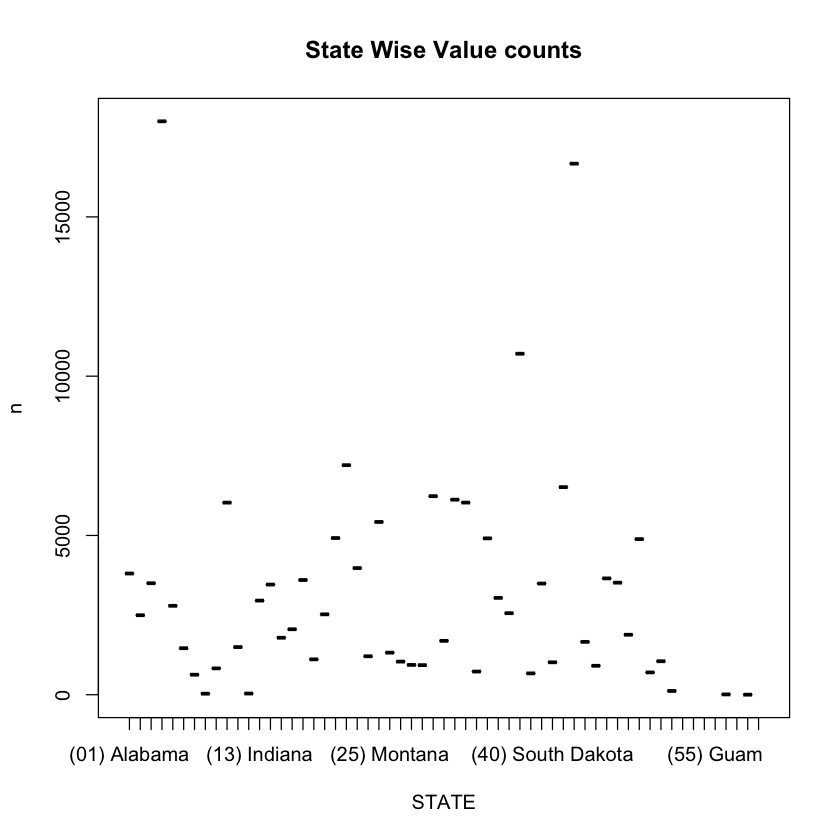

In [144]:
value_counts <- combined_df %>%
  count(STATE)

plot(value_counts, main = "State Wise Value counts")

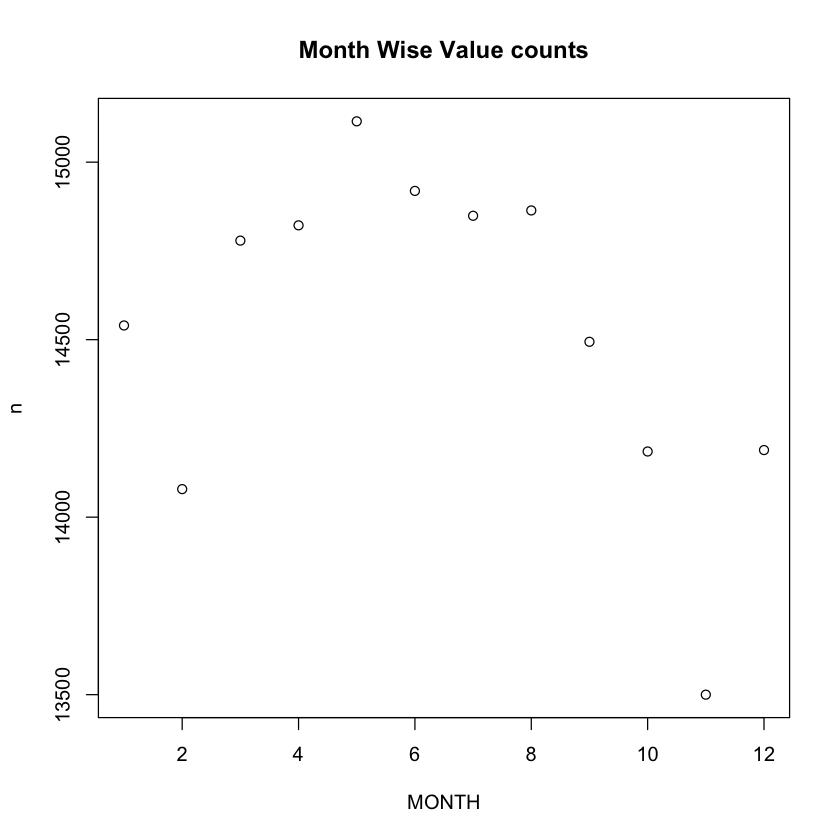

In [145]:
value_counts <- combined_df %>% count(MONTH)

plot(value_counts, main = "Month Wise Value counts")

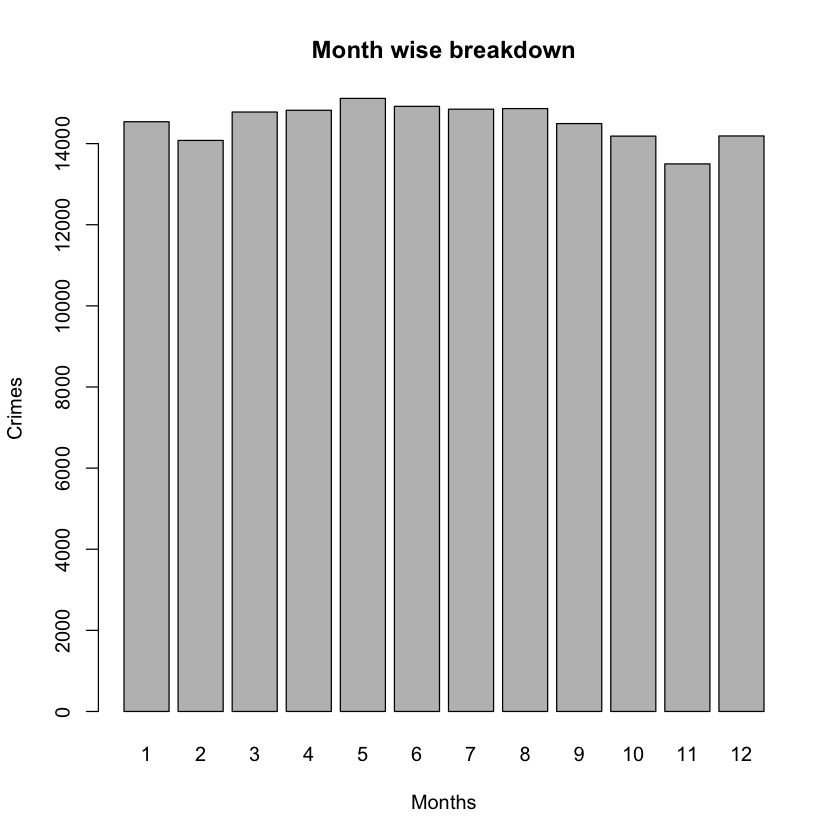

In [157]:
barplot(value_counts$n, names.arg = value_counts$MONTH, xlab = 'Months', ylab = 'Crimes', main = 'Month wise breakdown')

In [159]:
value_counts <- combined_df %>% count(YEAR, MONTH)


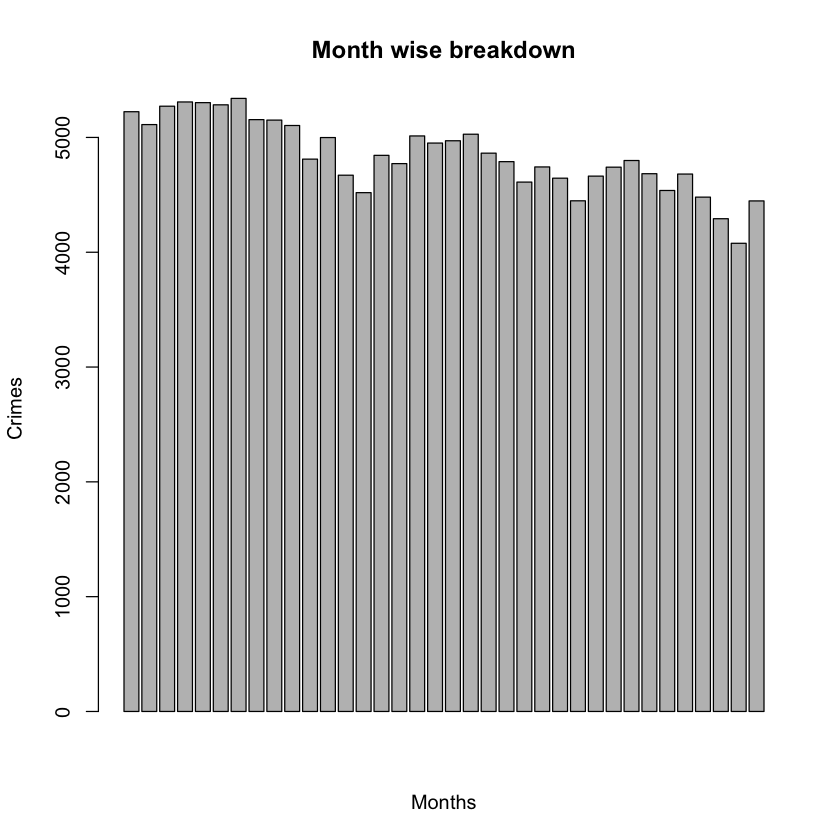

In [161]:
barplot(value_counts$n, xlab = 'Months', ylab = 'Crimes', main = 'Month wise breakdown')

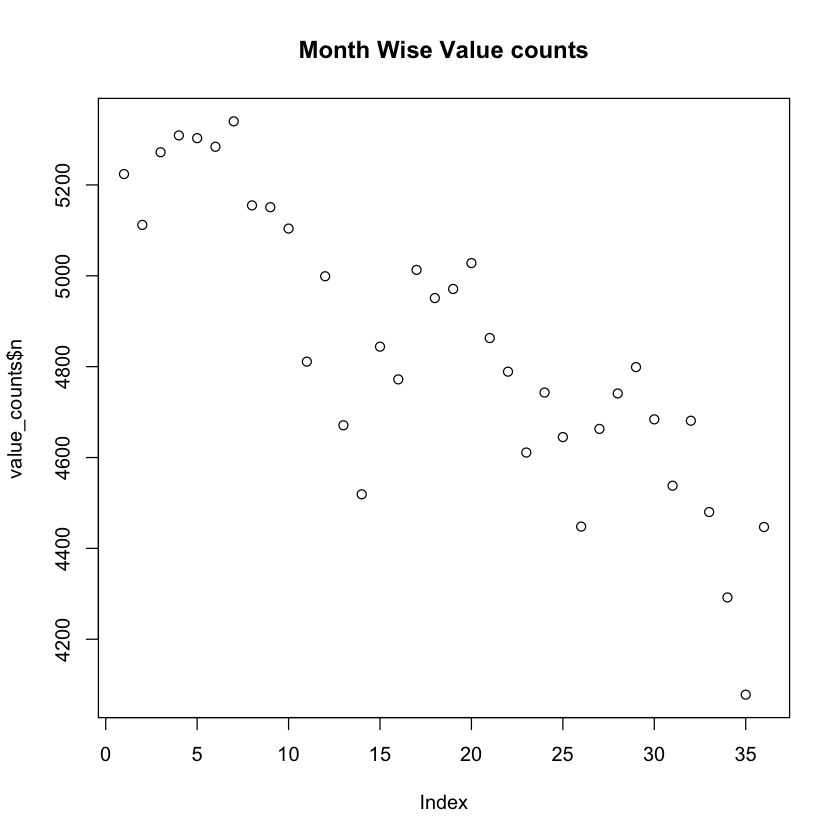

In [167]:
plot(value_counts$n, main = "Month Wise Value counts")

In [ ]:
# Hypothesis: Summer months have higher crimes than winter months

In [ ]:
da4 <- da1 |> 
  filter(!is.na(STATE) & !is.na(AA)) |> 
  group_by(STATE) |> 
  summarize(avg_adult_asian = mean(AA),
            count = n())
head(da4)